### Neural Network

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score
tf.logging.set_verbosity(tf.logging.WARN)

In [5]:
# generate fixed random numbers each time
seed = 4
rng = np.random.RandomState(seed)

### Preprocessing Data

In [6]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train=train['label']
x_train=train.iloc[:,1:]

x_test=x_train.iloc[-1000:,:].values
y_test=y_train.iloc[-1000:].values
x_train=x_train.iloc[:-1000,:].values
y_train=y_train.iloc[:-1000].values

#### Formating Output Data

In [10]:
a=np.zeros((y_train.shape[0],10))
a[np.arange(a.shape[0]).astype(int),y_train.astype(int)]=1
y_train=a

a=np.zeros((y_test.shape[0],10))
a[np.arange(a.shape[0]).astype(int),y_test.astype(int)]=1
y_test=a

### Tensorflow Architecture

In [35]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

input_units=28*28
hidden_units=500
output_units=10

epoches=5
batch_size=128
learning_rate=0.01

w={
    'input':tf.Variable(tf.random_normal([input_units,hidden_units], seed=seed)),
    'hidden':tf.Variable(tf.random_normal([hidden_units,hidden_units], seed=seed)),
    'output':tf.Variable(tf.random_normal([hidden_units,output_units], seed=seed))
}

b={
    'input':tf.Variable(tf.random_normal([hidden_units],seed=seed)),
    'hidden':tf.Variable(tf.random_normal([hidden_units], seed=seed)),
    'output':tf.Variable(tf.random_normal([output_units],seed=seed))
}

### Computational Graph

In [36]:
hidden_layer_1=tf.add(tf.matmul(x,w['input']),b['input'])
hidden_layer_1=tf.nn.relu(hidden_layer_1)

hidden_layer_2=tf.add(tf.matmul(hidden_layer_1,w['hidden']),b['hidden'])
hidden_layer_2=tf.nn.relu(hidden_layer_2)

output_layer=tf.matmul(hidden_layer_2,w['output'])+b['output']

### Cost
Here we are using `softmax` function with `cross entropy` cost. `tf.nn.softmax_cross_entropy_with_logits` is a combination of two calls `tf.nn.softmax` and `tf.reduce_sum` but in a more mathematically efficient way.

In [37]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer,labels=y))

### Optimizer
We will use backpropagation for optimization.

In [38]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Main
Lets begin by creating initializer pointer for all of the variables

In [39]:
init=tf.global_variables_initializer()

##### Helper function

In [40]:
def batch_creator(size,index):
    s=index*batch_size
    e=s+batch_size
    x_batch=x_train[s:e,:]
    y_batch=y_train[s:e]
    return x_batch,y_batch

### Session

In [41]:
ses=tf.Session()
ses.run(init)

### Train

epoch:  1  average cost:  31857.4165363
epoch:  2  average cost:  5566.40597839
epoch:  3  average cost:  2547.33069983
epoch:  4  average cost:  1768.77921228
epoch:  5  average cost:  1330.72595978
epoch:  6  average cost:  1288.96037731
epoch:  7  average cost:  1217.42465916
epoch:  8  average cost:  1072.23599548
epoch:  9  average cost:  877.833927631
epoch:  10  average cost:  990.44150238
epoch:  11  average cost:  971.082207012
epoch:  12  average cost:  1010.53554211
epoch:  13  average cost:  829.671827984
epoch:  14  average cost:  648.346167564
epoch:  15  average cost:  774.831152534
epoch:  16  average cost:  849.615797335
epoch:  17  average cost:  744.286557961
epoch:  18  average cost:  587.376727962
epoch:  19  average cost:  627.262820258
epoch:  20  average cost:  533.023884201
epoch:  21  average cost:  630.01507926
epoch:  22  average cost:  542.709968185
epoch:  23  average cost:  619.106996822
epoch:  24  average cost:  648.780899286
epoch:  25  average cost:  

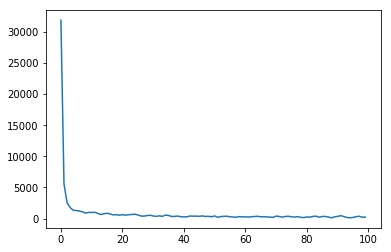

In [42]:
total_batch=int(x_train.shape[0]/batch_size)
e=[]
for epoch in range(epoches):
    avg_cost=0
    for i in range(total_batch):
        batch_x,batch_y=batch_creator(batch_size,i)
        o,c=ses.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    e.append(avg_cost)
    print("epoch: ",epoch+1," average cost: ",avg_cost)
print("training complete")
plot.plot(e)
plot.show()

### Prediction

In [43]:
prediction=ses.run(tf.argmax(output_layer,axis=1),{x:x_test})

### Accuracy

In [44]:
y_true=tf.argmax(y_test,axis=1)
score=accuracy_score(ses.run(y_true),prediction)
print("accuracy:",score)

accuracy: 0.974


### Training Final Result

In [45]:
data={'Label':prediction}
df=pd.DataFrame(data=data)
df.index.name='ImageId'
df.head()

,Label
ImageId,
0,2
1,8
2,1
3,8
4,0


### Test

In [46]:
prediction=ses.run(tf.argmax(output_layer,axis=1),{x:test.values})
data={'Label':prediction}
df=pd.DataFrame(data=data)
df.index+=1
df.index.name='ImageId'
df.to_csv("numbers.csv",sep=",")
df.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
